In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [106]:
dfeo = pd.read_csv('EO_opt_X.csv', index_col=0)
dfss = pd.read_csv('SS_opt_X.csv', index_col=0)
dfsto = pd.read_csv('STO_opt_x.csv', index_col=0)
# perato_det = pd.read_csv('perato_det.csv')
perato_det = pd.read_csv('PERATO_0401.csv')
perato_tesla = pd.read_csv('perato_tesla.csv')

---

In [228]:
perato = pd.read_csv('perato_comb_0406_V1.csv')
perato0 = perato.iloc[range(10),:]
pct_eo = 3.667e6
pct_ss = -9.518e6

In [229]:
xrange = [-3e6, 9e6]
yrange = [-1.5e7, 0.5e7]

In [258]:
# fig1 = px.line(perato, x="EO", y="SS", markers=False)
# fig1.update_traces(line=dict(color = 'rgba(50,50,50,0.2)'))
# fig2 = px.scatter(perato, 
#                   x="EO", 
#                   y="SS", 
#                   color="PCT",
#                   color_continuous_scale=px.colors.sequential.RdYlGn_
#                  )

# fig3 = go.Figure(data=fig1.data + fig2.data)
# fig3.show()


fig1 = px.line(perato0, x="EO", y="SS", markers=False, color="source")
fig1.update_traces(line=dict(color='rgba(50,50,50,0.2)', width=3))

fig2 = px.scatter(perato, 
                  x="EO", 
                  y="SS", 
                  width=750,
                  height=600,
                  template='plotly_white',
                  color="PCT",
                  color_continuous_scale='RdYlGn_r'
                 ).add_trace(fig1.data[0]).add_trace(fig1.data[1])

fig2.update_traces(marker=dict(size=13,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))


fig2.add_scatter(x=[tesla_eo],
                y=[tesla_ss],
                marker=dict(
                    line=dict(width=2, color="DarkSlateGrey"),
                    size=13,
                    symbol="hexagram"
                ),
               name='Tesla Current Case')

fig2.update_xaxes(range=xrange)
fig2.update_yaxes(range=yrange)
fig2.add_vline(x=0, line_width=1, line_dash="solid", line_color="black")
fig2.add_hline(y=0, line_width=1, line_dash="solid", line_color="black")

v = [0, 0, xrange[0], yrange[0], 'limegreen']
fig2.add_shape(
    type='rect',
    x0=v[0], y0=v[1], x1=v[2], y1=v[3],
    line=dict(color='black', width=0),
    fillcolor=v[4],
    opacity=0.4
)


fig2.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [-2e6,0,2e6,4e6,6e6,8e6],
        ticktext = ['-2', '0', '2', '4', '6', '8'],
        tickfont = dict(size=15)
    ),
    yaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(-15e6, 5e6+1, 5e6).tolist(),
        ticktext = ['-15', '-10', '-5', '0', '5'],
        tickfont = dict(size=15)
    )
)

fig2.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig2.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)



In [259]:
fig2.write_image("pareto_curve_color2.svg")

## Perato Curve

In [120]:
perato = pd.read_csv('perato_comb_0406_V1.csv')

In [121]:
xrange = [-3e6, 9e6]
yrange = [-1.5e7, 0.5e7]

In [122]:
tesla_eo = 3.614e6
tesla_ss = -1.034e7

In [123]:
pct_eo = 3.667e6
pct_ss = -9.518e6

In [128]:
# px.line(perato, x="EO", y="SS", color="source", markers=False, template='plotly_white', width=700, height=500)

fig = px.scatter(
    perato,
    x="EO",
    y="SS",
    color="source",
    size="PCT",
    template='plotly_white',
    width=700, 
    height=500,
).update_traces(mode="lines+markers")


fig.add_scatter(x=[tesla_eo],
                y=[tesla_ss],
                marker=dict(
                    line=dict(width=2, color="DarkSlateGrey"),
                    size=10,
                    symbol="hexagram"
                ),
               name='Tesla Current Case')

fig.update_xaxes(range=xrange)
fig.update_yaxes(range=yrange)
fig.add_vline(x=0, line_width=1, line_dash="solid", line_color="black")
fig.add_hline(y=0, line_width=1, line_dash="solid", line_color="black")

v = [0, 0, xrange[0], yrange[0], 'limegreen']
fig.add_shape(
    type='rect',
    x0=v[0], y0=v[1], x1=v[2], y1=v[3],
    line=dict(color='black', width=0),
    fillcolor=v[4],
    opacity=0.4
)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [-2e6,0,2e6,4e6,6e6,8e6],
        ticktext = ['-2', '0', '2', '4', '6', '8'],
        tickfont = dict(size=15)
    ),
    yaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(-15e6, 5e6+1, 5e6).tolist(),
        ticktext = ['-15', '-10', '-5', '0', '5'],
        tickfont = dict(size=15)
    )
)


fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)

In [111]:
df = pd.DataFrame([(tesla_eo, tesla_ss, 'Tesla'), (pct_eo, pct_ss, 'Pct')], columns=['EO', 'SS', 'Type'])
df

,EO,SS,Type
0,3614000.0,-10340000.0,Tesla
1,3667000.0,-9518000.0,Pct


In [112]:
perato = pd.read_csv('perato_comb.csv')
fig = px.line(perato, x="EO", y="SS", color="source", markers=True, template='plotly_white', width=700, height=500)

fig.add_scatter(x=[tesla_eo],
                y=[tesla_ss],
                marker=dict(
#                     color='black',
                    line=dict(width=2, color="DarkSlateGrey"),
                    size=10
                ),
               name='Tesla')

fig.add_scatter(x=[pct_eo],
                y=[pct_ss],
                marker=dict(
                    line=dict(width=2, color="DarkSlateGrey"),
                    size=10,
                    symbol="hexagram"
                ),
               name='Least ecological overshoot%')


fig.update_xaxes(range=xrange)
fig.update_yaxes(range=yrange)
fig.add_vline(x=0, line_width=1, line_dash="solid", line_color="black")
fig.add_hline(y=0, line_width=1, line_dash="solid", line_color="black")


v = [0, 0, xrange[0], yrange[0], 'limegreen']
fig.add_shape(
    type='rect',
    x0=v[0], y0=v[1], x1=v[2], y1=v[3],
    line=dict(color='black', width=0),
    fillcolor=v[4],
    opacity=0.4
)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [-2e6,0,2e6,4e6,6e6,8e6],
        ticktext = ['-2', '0', '2', '4', '6', '8'],
        tickfont = dict(size=15)
    ),
    yaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(-15e6, 5e6+1, 5e6).tolist(),
        ticktext = ['-15', '-10', '-5', '0', '5'],
        tickfont = dict(size=15)
    )
)


fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)

In [57]:
fig.write_image("pareto_curve_0406.svg")

## Heatmap

In [28]:
# dfls = [dfeo, dfss]
# res = np.zeros([3,3])
# for i in range(3):
#     for j in range(3):
#         if dfls[i].equals(dfls[j]):
#             print([i,j])

In [29]:
def get_cty_name(ls):
    cty_ls = []
    
    for data in ls:
        cty_ls += list(data.loc[~(data==0).all(axis=1)].index)
    country = list(set(cty_ls))
    country = sorted(country)
    
    return country    

In [30]:
# dfls = [dfeo, dfss]
dfls = [dfeo, dfss, dfsto]
ls_country = get_cty_name(dfls)
ls_country = sorted(ls_country)

In [31]:
# data_eco = df_eco.loc[ls_country, :]
# data_soc = df_soc.loc[ls_country, :]

In [32]:
def normalize_df(df):
    columns = df.columns.tolist()
    for col in columns:
        col_sum = 1.0 / df[col].sum()
        df[col] *= col_sum
    return df

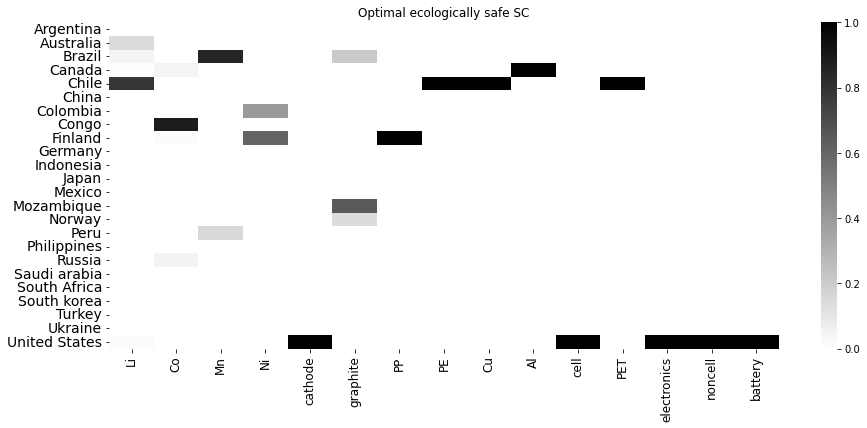

In [45]:
data = dfeo.loc[ls_country, :]
data_new = normalize_df(data)

plt.figure(figsize=(15, 6))
ax = sns.heatmap(data_new, annot=False, cmap='binary', vmin=0, cbar=True)
# ax = sns.heatmap(data_new, annot=False, cmap='YlGn', vmin=0, cbar=True)
plt.title('Optimal ecologically safe SC')
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
ax.set(ylabel=None)
plt.savefig("Ecological_det.svg")

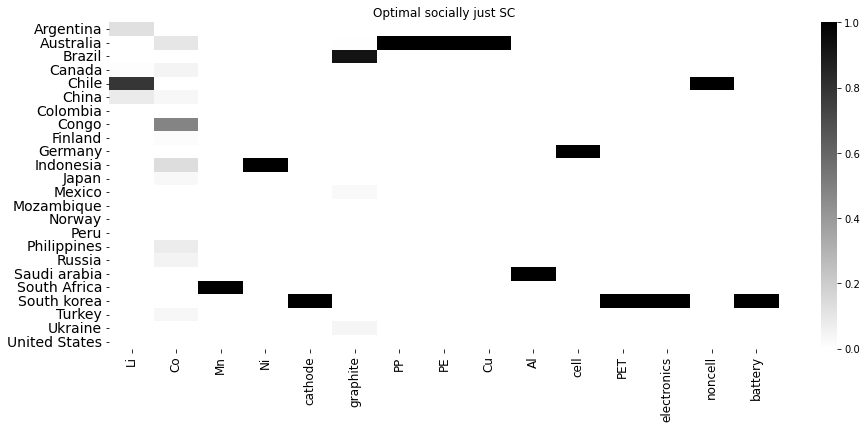

In [46]:
data = dfss.loc[ls_country, :]
data_new = normalize_df(data)

plt.figure(figsize=(15, 6))
ax = sns.heatmap(data_new, annot=False, cmap='binary', vmin=0, cbar=True)
plt.title('Optimal socially just SC')
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
ax.set(ylabel=None)
plt.savefig('Social_det.svg')

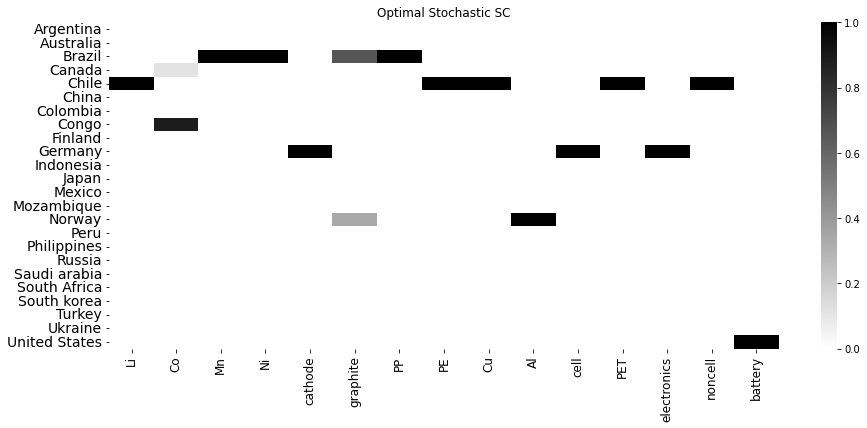

In [48]:
data = dfsto.loc[ls_country, :]
data_new = normalize_df(data)

plt.figure(figsize=(15, 6))
ax = sns.heatmap(data_new, annot=False, cmap='binary', vmin=0, cbar=True)
plt.title('Optimal Stochastic SC')
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
ax.set(ylabel=None)
plt.savefig('Eco_stoc.svg')

---

In [21]:
sd = pd.read_csv('./Oct31/emission_sink.csv', index_col=0)
sd1 = sd[['SD_ratio_log']]

In [22]:
sd1 = sd1.loc[ls_country, :]
sd1

,SD_ratio_log
country,
Argentina,-0.043832
Australia,-0.131944
Brazil,0.344392
Canada,0.344392
Chile,0.914343
China,-1.129596
Colombia,0.170262
Congo,0.133539
France,-0.258061


In [28]:
sd2 = sd.loc[ls_country, :]
sd2 = sd2[['sink ton/yr']]
sd2

,sink ton/yr
country,
Argentina,1.790000e+08
Australia,2.870000e+08
Brazil,1.810000e+09
Canada,1.360000e+09
Chile,2.750000e+08
China,7.490000e+08
Colombia,2.420000e+08
Congo,8.230000e+08
France,1.320000e+08


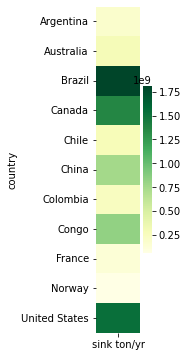

In [31]:
plt.figure(figsize=(1, 6))
sns.heatmap(sd2, annot=False, cmap='YlGn', cbar=True)
plt.savefig('S_country1107.svg')

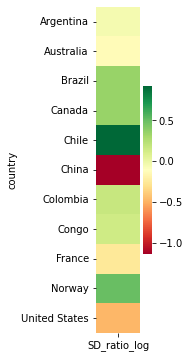

In [24]:
plt.figure(figsize=(1, 6))
sns.heatmap(sd1, annot=False, cmap='RdYlGn', cbar=True)
plt.savefig('SD_country1105.svg')

In [29]:
import qrcode

In [30]:
import qrcode
import qrcode.image.svg

img = qrcode.make('https://www.linkedin.com/in/yingxueyx/', image_factory=qrcode.image.svg.SvgImage)

with open('qr.svg', 'wb') as qr:
    img.save(qr)